# ZTDL 4: Deep Learning Intro – shallow model

## Opdracht 5.1 vragen uitwerking

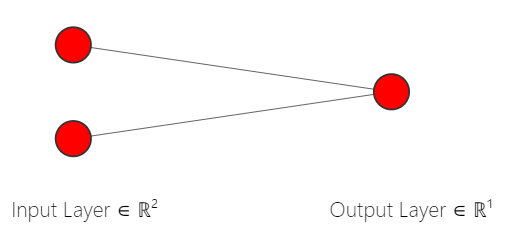

In [13]:
from PIL import Image
img = Image.open('../data/opdracht5_1.png')
# 1) Bestudeer in in ZTDL 4 het Shallow Model dat wordt toegepast op de dataset, zie ook figuur 11.
    # Zie de hierboven toegevoegde commentaar.
# 2) Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training.
    # De output laag heeft 3 weegfactoren: 2 weegfactoren van de input layer en 1 weegfactor van de bias.
img
# 3)  Waarom werkt het Shallow model hier niet?
    # Het model bevat alleen een input layer en een output layer. Daardoor zal het model hier niet werken.

In [14]:
#setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

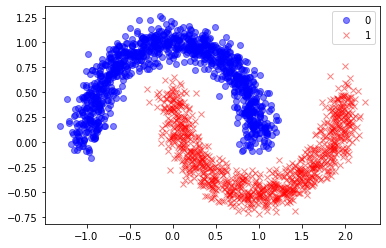

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=2000, noise=0.1, random_state=0)
#Generating some moons with the make_moons function.
# n_samples is the number of moons we gen
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
# Draw the x moons
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
# Draw the y moons
plt.legend(['0', '1'])
# Adding a legenda

In [4]:
#Return the shape of an array. 1000 entries, 2 columns
X.shape

(2000, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Een goede strategy is een data set splitsen, een deel voor training en een deel 
# voor het creeeren van je model
# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [7]:
# Setup
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

### Shallow Model

In [8]:
# The Sequential model, which is very straightforward (a simple list of layers), 
# but is limited to single-input, single-output stacks of layers (as the name gives away).
model = Sequential()

# First 1 means our Dense needs 1 neuron, input shape is equal to 2, nothing. Because we are feeding
# in two values, and getting one value back
# The sigmoid activation function, also called the logistic function, is traditionally a very popular activation function
# for neural networks. The input to the function is transformed into a value between 0.0 and 1.0. 
# Inputs that are much larger than 1.0 are transformed to the value 1.0, 
# similarly, values much smaller than 0.0 are snapped to 0.0.
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

# We are using a optimizer, an optimizer is miniming the loss of the function. (minimize error)
# Adam is considered to be one of the best optimizers. Won't really matter much because we
# are using a small data sample/network (two vals)
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [9]:
# train the model with model.fit()
# An epoch means how many times the program runs trough the data
# After the first epoch, we rerun trough our data and keep optimizing it
# Larger dataset means less epochs.
# Batch_size is the amount of data points we give to the network every time
model.fit(X_train, y_train, epochs=200, verbose=0)

In [10]:
# Returns the loss value & metrics values for the model in test mode.
results = model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.8983


In [11]:
# print out results
results

[0.23526886105537415, 0.8983333110809326]

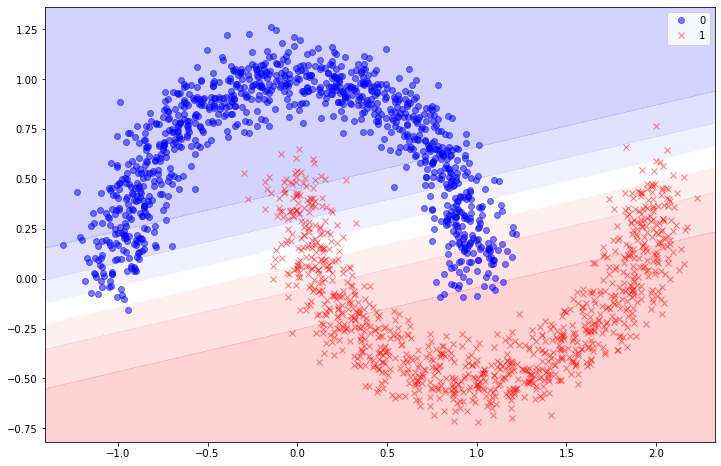

In [12]:
def plot_decision_boundary(model, X, y):
    # generates the contour plot below.
    # Set min and max values and give it some padding
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    # Generate a grid of points with distance h between them
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # Predict the function value for the whole gid
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    # Plot the contour and training examples
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)